### MY470 Computer Programming
# Functional Programming in Python
### Week 10 Lab

## Recap: Recursion

**Recursion is the process of determining something in terms of itself.**

We know that in Python, any function can call any other function, a function can also call itself. These types of functions which call itself till the certain condition is not met are termed as recursive functions.

The most common example used to explain recursion is **factorials**, which is the product of an integer and all the integers below it. e.g. factorial four ( Written as 5! ) is equal to 120.

```python
factorial(n) = n * factorial(n)
```
In less abstract terms

```python
factorial(1) = 1

factorial(5) = 5 * 4 * 3 * 2 * 1
```

Or visually;

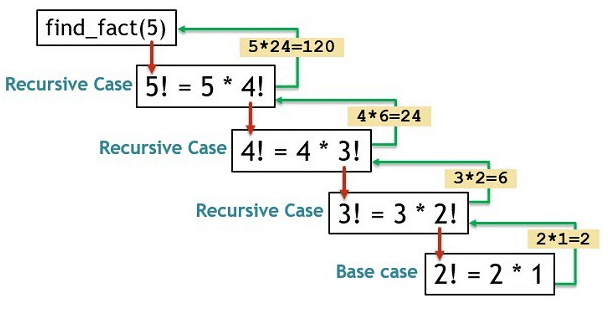

The **base case**, or halting case, of a function is the problem that we know the answer to, that can be solved without any more recursive calls. 

The base case is what stops the recursion from continuing on forever.

A good video on recursion is produced by the YoutTube channel "Computerphile": https://www.youtube.com/watch?v=Mv9NEXX1VHc

In [29]:
# The function is.

def factorial(n):
    "returns factorial of n"
     # Test what n is
    print("n is", n)
    if n == 1:
        # Becuase factorial(1) = 1
        # So to avoid "maximum recursion depth" error
        return n
    else:
        # Function calls itself.
        # I can't return the answer until I have worked out what n is
        # Until n is 1 (meeting if condition)
        return n * factorial(n-1)

# The value of n changes as the fuction calls itself
factorial(5)


n is 5
n is 4
n is 3
n is 2
n is 1


120

## The procedural pogramming paradigm

A programming paradigm is the standard practice, how you *think about* or *approach a problem*.

Python at its core follows the procedural programming paradigm.

- Think of programming like a recipe
- You give specific instructions on what to do and how to do it
- You have a global state that you are modifying

You think about how things are changing over time rather that what methods you are calling to get the result you want.

## The functional programming paradigm

Core principles:
* Functions are deterministic and always produce the same output for the same input (set seed for stochastic (random) process)
* Functions have no side effects (e.g. modify arguments, modify global variables, print)
* Variables and data are immutable
* Functions can be passed to other functions as parameters, returned by other functions as output, and stored in data structures
* Use recursion to implement iteration

## The functional programming paradigm

![Functional programming](figs/functional_programming.png "Functional programming")
Source: https://xkcd.com/1790/


## Advantages and disadvantages of functional programming

* Advantages
    * Code is easier to understand
    * Code is easier to test and debug
    * FP is needed to implement concurrency/parallelism
* Disadvantages
    * Pure functions and recursion can be difficult to understand
    * Immutable values and recursion can decrease performance
    * Immutable values require large memory space


## Functional programming in R vs. Python

* R is, at heart, a functional programming language and R users espouse the paradigm
    * `apply` functions
    * piping `%>%` with `dplyr`
    * anonymous functions: `lapply(mtcars, function(x) length(unique(x)))`
    
* Functional programming is enabled in Python but it is not the preferred paradigm
    * `lambda` functions, `filter`, `map`, `reduce`
    * Guido van Rossum would rather have you use list comprehensions
    * FP tools can be helpful but there is no need to take the paradigm to an extreme


## Anonymous functions with `lambda`

The lambda function:

``` python
lambda parameter_1, parameter_2: expression
```

is equivalent to:

``` python
def my_function(parameter_1, parameter_2):
    expression
```

A function definition that is not bound to an identifier (i.e., it nas no name).

Anonymous functions are also called function-literals.

If the function is only used once, or a limited number of times, an anonymous function may be syntactically lighter than using a named function.

## Anonymous functions with `lambda`


``` python
lambda parameter_1, parameter_2: expression
```

The lambda function is an expression. You have a parameter list like you do in a user defined function. 

A lambda function can take **any number of arguments**, but can only have **one expression**.

In lambda, your code must be on the same line. You can use a `\` to break up lines, but anonymous functions should not be very long.

The lambda expression **returns a callable** (i.e. function). 

## Anonymous functions with `lambda`

In [31]:
authors = ['George Orwell', 'Zadie Smith', 'J.K. Rowling', 
           'Roald Dahl', 'Salman Rushdie']

# Return list ordered by length of author name
sorted(authors, key=len)  

['Roald Dahl',
 'Zadie Smith',
 'J.K. Rowling',
 'George Orwell',
 'Salman Rushdie']

In [32]:
# Return list ordered alphabetically by last name

sorted(authors, key=lambda name: name.split()[-1])  

['Roald Dahl',
 'George Orwell',
 'J.K. Rowling',
 'Salman Rushdie',
 'Zadie Smith']

## Iteration with `filter`

The filter function:

```python
filter(function_to_evaluate_true, iterable)
```

is equivalent to:

```python
(item for item in iterable if function_to_evaluate_true(item))
```

Filter returns an iterable.

Filter applies the function to each item in the passed iterable. If the result is `True`, then it adds the item to the iterator. If it is `False`, then it keeps going until it finds a `True` or reaches the end.

In [48]:
my_var = filter(lambda a: a%2 == 1,
                reversed(range(20)))

# What is the first result of calling next() my_var?

In [49]:
# It returns odd numbers, counting back from 19
next(my_var)

19

## Iteration with `filter`

In [50]:
# Return list of authors whose last name starts with 'R'
list(filter(lambda name: name.split()[-1][0]=='R', authors))

['J.K. Rowling', 'Salman Rushdie']

In [41]:
# Can use filter to remove empty strings from a list
names = ["Sian", "", "Patrick", "Milena", "", "Yuanmo"]

# We can pass None as the first argument
# If function_to_evaluate_true is None, the identity function is assumed, 
# that is, all elements of iterable that are false are removed
# In Python, empty strings evaluate as False
filt_names = list(filter(None, names))
filt_names

['Sian', 'Patrick', 'Milena', 'Yuanmo']

## Iteration with `map`

```python
map(function_to_apply, iterable)
```

`map()` takes a function and one or more iterables. Returns an iterator.

1. Takes each of the iterables.
2. Calls next() on each of them. 
3. Passes these as a series of arguments to the function.
4. The result of the iterator is the result of the function.

In [51]:
# Takes x and y and adds them together; returns an iterable
my_var = map(lambda x, y: x + y, range(10), range(10, 20))

In [58]:
next(my_var)

22

## Iteration with `map`

In [59]:
# Get the length of each name in authors
list(map(len, authors))

[13, 11, 12, 10, 14]

In [23]:
# Invert author name to Last, First
list(map(lambda name: ', '.join(reversed(name.split())), authors))

['Orwell, George',
 'Smith, Zadie',
 'Rowling, J.K.',
 'Dahl, Roald',
 'Rushdie, Salman']

## List comprehensions vs. `map`

In [24]:
import math

def area(r):
    """
    Reurns area of a circle with radius 'r'.
    Accepts numeric types
    """
    return math.pi * (r**2)

# What if we need to compute the area for lots of different circles?
radii = [2, 5, 7.8, 4.2, 37]

# List comprehension
areas1 = [area(r) for r in radii]
    
# With map ... (can pass the map object to the list constructor)
areas2 = list(map(area, radii))

In [25]:
from timeit import timeit

print('List comprehension:', timeit('[area(r) for r in radii]', 
                                    setup='from __main__ import area, radii', 
                                    number=10**5) )
print('Map function:',  timeit('list(map(area, radii))', 
                               setup='from __main__ import area, radii', 
                               number=10**5) )

List comprehension: 0.5959788999998636
Map function: 0.640332999999373


## Iteration with `reduce`

Applies a rolling computation to sequential pairs of values in an iterable. Simular logic to recursion.

```
data = [a, b, c, d, e, ... n]

reduce(function, data):
    Step 1: val_1 = function(a, b)
    Step 2: val_2 = funtion(val_1, c)
    Step 2: val_3 = funtion(val_2, d)
    Step 2: val_4 = funtion(val_3, e)
    [...]
    Step n-1: val_n-1 = function(val_n-2, n)
```

1. Initially, the function is called with the first two items from the sequence and the result is returned.
2. The function is then called again with the result obtained in step 1 and the next value in the sequence. This process keeps repeating until there are items in the sequence.

In [60]:
# No longer a built-in funtion in Python 3

# Guido van Rossum: "Use functools.reduce() if you really need it; 
# however 99% of the time an explict for-loop is more readable."

from functools import reduce

reduce(lambda x, y: x + ', ' + y, authors)  # equivalent to: ', '.join(authors)

'George Orwell, Zadie Smith, J.K. Rowling, Roald Dahl, Salman Rushdie'

## Iteration with `reduce`

In [61]:
# Multiply all numbers in a list

data = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

# To use reduce, you need a funtion that takes two inputs.
multiplier = lambda x, y: x*y
print(reduce(multiplier, data))

# For-loop
product = 1
for x in data:
    product = product * x 
print(product)

6469693230
6469693230


In [50]:
# Exercise 1: Use map() and lambda to add each elements of two lists below. 
# The answer should be [101, 210, 400, 1400, 10500].

ls1 = [100, 200, 300, 400, 500]
ls2 = [1, 10, 100, 1000, 10000]


In [51]:
# Exercise 2: Now use a list comprehension to solve Exercise 1.


In [52]:
# Exercise 3: Use map() and lambda to create a list consisting of 
# the frequency of the letter "a" (regardless of case) in each string
# in the list below. The answer should be [3, 4, 2, 3].

states = ["Alaska", "Alabama", "Arizona", "Arkansas"]


In [53]:
# Exercise 4: Use filter() and lambda to get a list 
# of all the vowels in the string.

sentence = 'They did nothing as the raccoon attacked the lady’s bag of food.'


## Summary

`Filter` takes all objects in a list and runs that through a function to create a new list with all objects that return True in that function.

`Map` takes all objects in a list and allows you to apply a function to it. 

`Reduce` applies a function to all of the list elements mentioned in the sequence passed along.